<a href="https://colab.research.google.com/github/viktoriya-bel/Tensorflow-labs/blob/main/Exercise_6_Game_hands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Обучение  CNN на полном наборе данных "Камень, ножницы, бумага"

In [2]:
# В этом блоке кода находятся все необходимые импорты
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

Сначала надо получить данные.

In [5]:
# Этот блок кода загружает тестовый и тренировочный набор данных и сохраняет его как
# zip. Затем он распаковывает его в /tmp.

!wget --no-check-certificate \
    "https://storage.googleapis.com/download.tensorflow.org/data/rps.zip" \
    -O "/tmp/rps.zip"

!wget --no-check-certificate \
    "https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip" \
    -O "/tmp/rps-test-set.zip"

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2023-05-29 07:59:52--  https://storage.googleapis.com/download.tensorflow.org/data/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   131MB/s    in 1.5s    

2023-05-29 07:59:53 (131 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2023-05-29 07:59:53--  https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-tes

Проверьте, все ли получилось

In [8]:
print(len(os.listdir('/tmp/rps/scissors')))
print(len(os.listdir('/tmp/rps/paper')))
print(len(os.listdir('/tmp/rps/rock')))
print(len(os.listdir('/tmp/rps-test-set/scissors')))
print(len(os.listdir('/tmp/rps-test-set/paper')))
print(len(os.listdir('/tmp/rps-test-set/rock')))

# Вывод должен быть примерно такой:
# 840
# 840
# 840
# 124
# 124
# 124

840
840
840
124
124
124


###Определите модель KERAS для классификации кошек и собак. 

Используйте как минимум три сверточных слоя

In [12]:
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])


model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])

###Добавляем слой предварительной подготовки данных обучения и валидации. 

Используйте Data Generator, как вы делали это раньше.

In [13]:
TRAINING_DIR = "/tmp/rps/"
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, 
    target_size=(300,300),
    batch_size=128,
    class_mode = 'categorical')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(300,300),
    batch_size=128,
    class_mode = 'categorical')



# Ожидаемый вывод
# Found 2520 images belonging to 3 classes.
# Found 372 images belonging to 3 classes.

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


Запускаем обучение модели.

*Обратите внимание: при загрузке изображений вы можете получить предупреждения об отсутствии или повреждении данных EXIF. Не беспокойтесь об этом - в изображениях отсутствуют некоторые тэги, это не визуальные данные, которые бы повлияли на тренировку.*

In [14]:
history = model.fit_generator(train_generator,
                              epochs=25,
                              verbose=1,
                              validation_data=validation_generator)

# Здесь ожидается, что после обучения модели точность будет более 95% как тренировочная, так и при валидации.

<ipython-input-14-c29f7a4edcea>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/25
20/20 [==============================] - 270s 13s/step - loss: 3.6211 - acc: 0.4246 - val_loss: 1.0366 - val_acc: 0.3952
Epoch 2/25
20/20 [==============================] - 276s 14s/step - loss: 0.6572 - acc: 0.7544 - val_loss: 1.0573 - val_acc: 0.5538
Epoch 3/25
20/20 [==============================] - 274s 14s/step - loss: 0.3637 - acc: 0.8778 - val_loss: 0.6560 - val_acc: 0.7742
Epoch 4/25
20/20 [==============================] - 276s 14s/step - loss: 0.3556 - acc: 0.9075 - val_loss: 0.6470 - val_acc: 0.7823
Epoch 5/25
20/20 [==============================] - 275s 14s/step - loss: 0.1343 - acc: 0.9607 - val_loss: 0.6799 - val_acc: 0.7124
Epoch 6/25
20/20 [==============================] - 276s 14s/step - loss: 0.0315 - acc: 0.9944 - val_loss: 0.5902 - val_acc: 0.7957
Epoch 7/25
20/20 [==============================] - 285s 14s/step - loss: 0.1009 - acc: 0.9651 - val_loss: 0.7098 - val_acc: 0.7204
Epoch 8/25
20/20 [==============================] - 280s 14s/step - loss: 0.

Смотрим графики процесса тренировки

Text(0.5, 1.0, 'Training and validation loss')

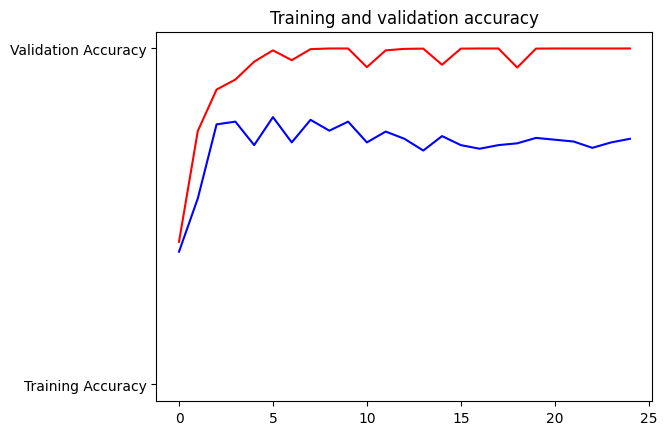

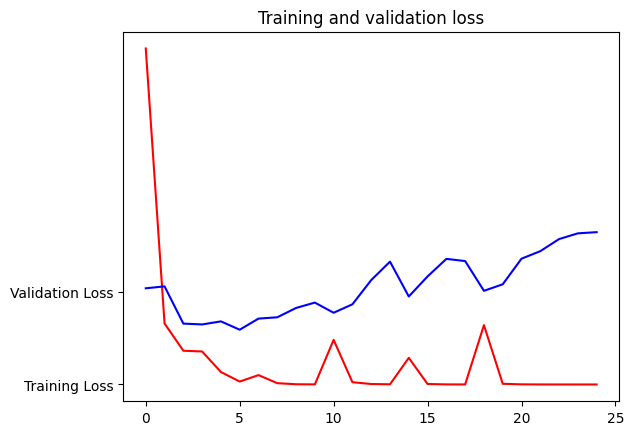

In [15]:

%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Получить список результатов на тренировочных и тестовых данных
# наборов для каждой эпохи обучения
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # количество эпох

#------------------------------------------------
# Рисуем точность обучения и проверки по эпохам
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Рисуем потери обучения и проверки по эпохам
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Желаемый вывод: графики с показателями обучения и валидации